In [1]:
import numpy as np
import pandas as pd
import pydicom
%matplotlib inline
import matplotlib.pyplot as plt
import keras 
from keras.models import model_from_json
from skimage.transform import resize

Using TensorFlow backend.


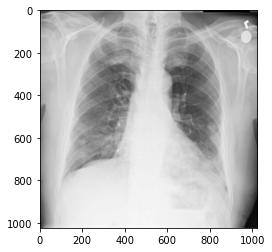

In [2]:
dcm1 = pydicom.dcmread('test1.dcm')
plt.imshow(dcm1.pixel_array,cmap='gray')

In [3]:
dcm1.PatientPosition

'PA'

In [4]:
dcm1.BodyPartExamined

'CHEST'

In [5]:
dcm1.BodyPartExamined == 'Chest'

False

In [11]:
# This function reads in a .dcm file, checks the important fields for our device, and returns a numpy array
# of just the imaging data
def check_dicom(filename): 
    # todo
    print('Load file {} ...'.format(filename))
    ds = pydicom.dcmread(filename)       
    img = ds.pixel_array
    if ds.PatientPosition in ['PA', 'AP'] and ds.BodyPartExamined == 'CHEST' and ds.Modality == 'DX':
        return img
    print('The conditions are not satisfied')
    
    
# This function takes the numpy array output by check_dicom and 
# runs the appropriate pre-processing needed for our model input
def preprocess_image(img,img_mean,img_std,img_size): 
    # todo
    img = img / 255
    img = resize(img, img_size)
    #grey_image = (img - img_mean)/img_std
    proc_img = np.zeros((224,224,3))
    # to RGB (input of the first layer)
    #proc_img[:, :, 0] = grey_image
    #proc_img[:, :, 1] = grey_image
    #proc_img[:, :, 2] = grey_image
    proc_img = np.resize(proc_img,(1,224,224,3))
    return proc_img

# This function loads in our trained model w/ weights and compiles it 
def load_model(model_path, weight_path):
    # todo
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    # load weights into new model
    model.load_weights(weight_path)
    print("Loaded model from disk")
    
    return model

# This function uses our device's threshold parameters to predict whether or not
# the image shows the presence of pneumonia using our trained model
def predict_image(model, img, thresh): 
    # todo    
    result = model.predict(img)  
    predict=result[0]
    prediction='Not a pneumonia'
    if(predict>thresh):
        prediction='Pneumonia'
    return prediction 

In [12]:
test_dicoms = ['test1.dcm','test2.dcm','test3.dcm','test4.dcm','test5.dcm','test6.dcm']

model_path = 'my_model.json'#path to saved model
weight_path = r'xray_class_my_model.best.hdf5'#path to saved best weights

IMG_SIZE=(1,224,224,3) # This might be different if you did not use vgg16
img_mean = 0.76# loads the mean image value they used during training preprocessing
img_std = 0.12 # loads the std dev image value they used during training preprocessing

my_model = load_model(model_path, weight_path)
thresh = 0.405 #loads the threshold they chose for model classification 

# use the .dcm files to test your prediction
for i in test_dicoms:
    
    img = np.array([])
    img = check_dicom(i)
    

    img_proc = preprocess_image(img,img_mean,img_std,IMG_SIZE)
    pred = predict_image(my_model,img_proc,thresh)
    print(pred)

        

Loaded model from disk
Load file test1.dcm ...
Pneumonia
Load file test2.dcm ...
Pneumonia
Load file test3.dcm ...
Pneumonia
Load file test4.dcm ...
The conditions are not satisfied
Load file test5.dcm ...
The conditions are not satisfied
Load file test6.dcm ...
The conditions are not satisfied
